# Problem 3: Barycentric interpolation

**Question 1**

Initially, we have to generate the random points and the function in the unit square for the given sample. Then we set building block 1 and 2.

Own algorithm:

A: [0.26071605 0.43635845]
B: [0.21315735 0.274245  ]
C: [0.10056103 0.27951775]
D: [0.20634391 0.44272557]
r_ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
y is in the triangle ABC with coordinates: [0.20901926 0.37774759]
r_CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
y is not in the triangle CDA


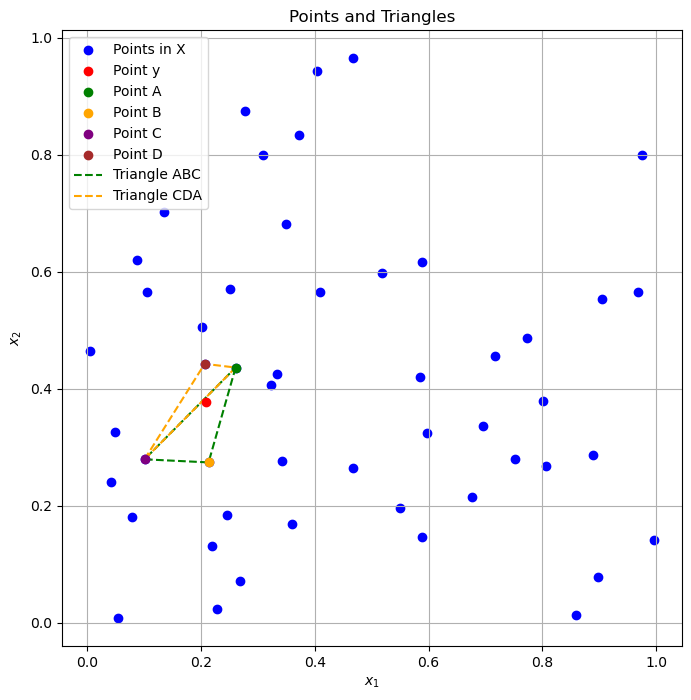

In [44]:
import numpy as np

# Generate random points and function values
def sample1(seed=2024):
    rng = np.random.default_rng(seed)
    X = rng.uniform(size=(50, 2))
    y= rng.uniform(size=(2,))
    return X, y

# Generate points and values
X, y = sample1()



# Building Block 1
def block_11(A, B, C, y):
    denominator = ((B[1]-C[1])*(A[0]-C[0]) + (C[0]-B[0])*(A[1]-C[1]))
    r1 = ((B[1]-C[1])*(y[0]-C[0]) + (C[0]-B[0])*(y[1]-C[1])) / denominator
    r2 = ((C[1]-A[1])*(y[0]-C[0]) + (A[0]-C[0])*(y[1]-C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3



# Building Block 2 (need to add NaN function)
def block_21(X, y):
    A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None) #linalg.norm is euclidean distance
    B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    
    # Return NaN if any point is not found
    if A is None:
        A = np.nan
    if B is None:
        B = np.nan
    if C is None:
        C = np.nan
    if D is None:
        D = np.nan
    return A, B, C, D


# Find nearest points A, B, C, D
A, B, C, D = block_21(X, y)

print("A:", A) 
print("B:", B)
print("C:", C)
print("D:", D)

#print r_ABC if not NaN
if not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
    r_ABC = block_11(A, B, C, y)
    print("r_ABC:", r_ABC)
    if 0 <= r_ABC[0] <= 1 and 0 <= r_ABC[1] <= 1 and 0 <= r_ABC[2] <= 1:
        y_ABC = r_ABC[0]*A + r_ABC[1]*B + r_ABC[2]*C
        print("y is in the triangle ABC with coordinates:", y_ABC)
    else:
        print("y is not in the triangle ABC")


#print r_CDA if not NaN
if not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
    r_CDA = block_11(C, D, A, y)
    print("r_CDA:", r_CDA)
    if 0 <= r_CDA[0] <= 1 and 0 <= r_CDA[1] <= 1 and 0 <= r_CDA[2] <= 1:
        y_CDA = r_CDA[0]*C + r_CDA[1]*D + r_CDA[2]*A
        print("y is the triangle CDA with coordinates:", y_CDA)
    else:
        print("y is not in the triangle CDA")


#Note that r1, r2 and r3 are in the interval [0,1] for r_ABC, why y is in the triangle ABC. We also note that for r_CDA this is not the case. We always have that:




import matplotlib.pyplot as plt

def plot_pointtriangle(X, y, A, B, C, D):
    if np.isnan(A).any() or np.isnan(B).any() or np.isnan(C).any() or np.isnan(D).any():
        print("NaN")
        return
    
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c='blue', label='Points in X')
    plt.scatter(y[0], y[1], c='red', label='Point y', zorder=5)
    
    if A is not None and not np.isnan(A).any():
        plt.scatter(*A, c='green', label='Point A', zorder=5)
    if B is not None and not np.isnan(B).any():
        plt.scatter(*B, c='orange', label='Point B', zorder=5)
    if C is not None and not np.isnan(C).any():
        plt.scatter(*C, c='purple', label='Point C', zorder=5)
    if D is not None and not np.isnan(D).any():
        plt.scatter(*D, c='brown', label='Point D', zorder=5)
    
    if A is not None and B is not None and C is not None and not np.isnan(A).any() and not np.isnan(B).any() and not np.isnan(C).any():
        plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'green', label='Triangle ABC', linestyle='dashed')
    if C is not None and D is not None and A is not None and not np.isnan(C).any() and not np.isnan(D).any() and not np.isnan(A).any():
        plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'orange', label='Triangle CDA', linestyle='dashed')
   
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Points and Triangles')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_pointtriangle(X, y, A, B, C, D)

Algorithm from question 3 and on:


In [4]:
import numpy as np


# Generate random points and function values
# Generate random points and function values
def sample(seed=2024):
    rng = np.random.default_rng(seed)
    X = rng.uniform(size=(50, 2))
    f = lambda x: x[0] * x[1]
    y = rng.uniform(size=(2,))
    F = np.array([f(x) for x in X])
    return X, F, y
# Generate points and values
X, F, y = sample()



# Building Block 1
def block_1(A, B, C, y):
    denominator = ((B[1]-C[1])*(A[0]-C[0]) + (C[0]-B[0])*(A[1]-C[1]))
    r1 = ((B[1]-C[1])*(y[0]-C[0]) + (C[0]-B[0])*(y[1]-C[1])) / denominator
    r2 = ((C[1]-A[1])*(y[0]-C[0]) + (A[0]-C[0])*(y[1]-C[1])) / denominator
    r3 = 1 - r1 - r2
    return r1, r2, r3



# Building Block 2 (need to add NaN function)
def block_2(X, y):
    A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None) #linalg.norm is euclidean distance
    B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    return A, B, C, D


# Find nearest points A, B, C, D
A, B, C, D = block_2(X, y)

print("A:", A) 
print("B:", B)
print("C:", C)
print("D:", D)

#Barycentric coordinates of ABC and CDA
r_ABC = block_1(A, B, C, y)
print("r_ABC:", r_ABC)

r_CDA = block_1(C, D, A, y)
print("r_CDA:", r_CDA)

#Note that r1, r2 and r3 are in the interval [0,1] for r_ABC, why y is in the triangle ABC. We also note that for r_CDA this is not the case. We always have that:
y_always = r_ABC[0]*A + r_ABC[1]*B + r_ABC[2]*C
print("y:", y_always)

y_not = r_CDA[0]*C + r_CDA[1]*D + r_CDA[2]*A
print("yn:", y_not)



#Interpolated value
def interpolate_value(X, F, y):
    A, B, C, D = block_2(X, y)
    r_ABC = block_1(A, B, C, y)
    r_CDA = block_1(C, D, A, y)
    
    if all(0 <= r <= 1 for r in r_ABC):
        interpolated_value = r_ABC[0] * F[np.where(np.all(X == A, axis=1))[0][0]] + \
                             r_ABC[1] * F[np.where(np.all(X == B, axis=1))[0][0]] + \
                             r_ABC[2] * F[np.where(np.all(X == C, axis=1))[0][0]]
    elif all(0 <= r <= 1 for r in r_CDA):
        interpolated_value = r_CDA[0] * F[np.where(np.all(X == C, axis=1))[0][0]] + \
                             r_CDA[1] * F[np.where(np.all(X == D, axis=1))[0][0]] + \
                             r_CDA[2] * F[np.where(np.all(X == A, axis=1))[0][0]]
    else:
        interpolated_value = np.nan
    
    return interpolated_value

intervalue = interpolate_value(X, F, y)
print("Interpolated value of point inside ABC:", intervalue)


A: [0.26071605 0.43635845]
B: [0.21315735 0.274245  ]
C: [0.10056103 0.27951775]
D: [0.20634391 0.44272557]
r_ABC: (0.6286263152916166, 0.06910145494351515, 0.3022722297648682)
r_CDA: (0.3682598757102867, -0.13392661883334067, 0.765666743123054)
y: [0.20901926 0.37774759]
yn: [0.20901926 0.37774759]
Interpolated value of point inside ABC: 0.08405201731052576


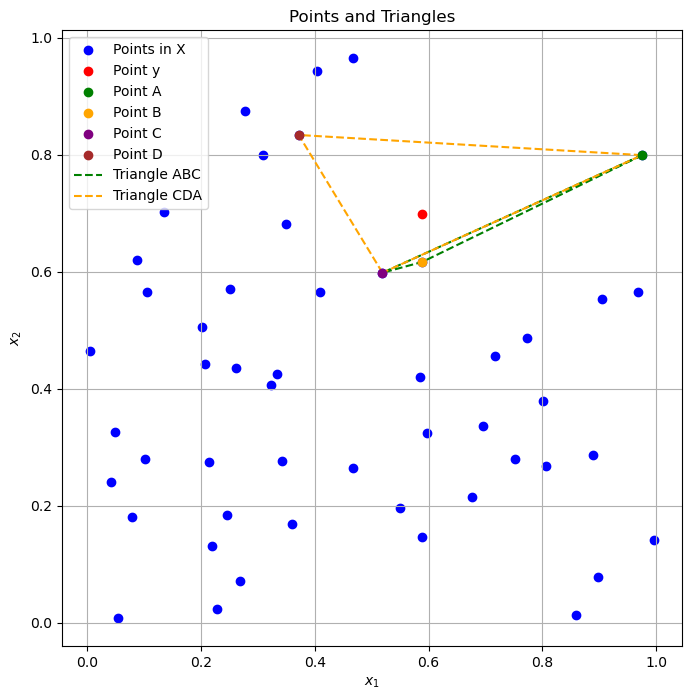

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points and function values
def generate_points_and_values(seed=2024):
    rng = np.random.default_rng(seed)
    X = rng.uniform(size=(50, 2))
    f = lambda x: x[0] * x[1]
    F = np.array([f(x) for x in X])
    return X, F

# Find the nearest points A, B, C, D based on conditions
def find_nearest_points(X, y):
    A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=None)
    return A, B, C, D

# Plot the points and triangles
def plot_points_and_triangles(X, y, A, B, C, D):
    plt.figure(figsize=(8, 8))
    plt.scatter(X[:, 0], X[:, 1], c='blue', label='Points in X')
    plt.scatter(y[0], y[1], c='red', label='Point y', zorder=5)
    
    if A is not None:
        plt.scatter(*A, c='green', label='Point A', zorder=5)
    if B is not None:
        plt.scatter(*B, c='orange', label='Point B', zorder=5)
    if C is not None:
        plt.scatter(*C, c='purple', label='Point C', zorder=5)
    if D is not None:
        plt.scatter(*D, c='brown', label='Point D', zorder=5)
    
    if A is not None and B is not None and C is not None:
        plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'green', label='Triangle ABC', linestyle='dashed')
    if C is not None and D is not None and A is not None:
        plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], 'orange', label='Triangle CDA', linestyle='dashed')
    
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.title('Points and Triangles')
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate points and values
X, F = generate_points_and_values()

# Define the point y with a fixed seed
np.random.seed(2024)
y = np.random.uniform(size=(2,))

# Find nearest points A, B, C, D
A, B, C, D = find_nearest_points(X, y)

# Plot the points and triangles
plot_points_and_triangles(X, y, A, B, C, D)
